# Exploratory Data Analysis on dataset ‘Indian Premier League’ (2008-2020)

## 1) Dynamic Data Analysis
## 2) Inter-Team Battle Analysis
## 3) Ground-Specific Analysis

### Dataset - Kaggle
### Analyst - SOHAM PATEL

In [245]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
matches=pd.read_csv('matches1.csv')   
delivery=pd.read_csv('deliveries1.csv')

In [248]:
matches.shape

(816, 17)

In [250]:
delivery.shape

(193468, 18)

In [251]:
matches = matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 
delivery = delivery.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")
matches = matches.replace(to_replace ="Bengaluru", value = "Bangalore") 

In [252]:
matches['team1'].value_counts()

Royal Challengers Bangalore    108
Delhi Capitals                 102
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Gujarat Lions                   16
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Rising Pune Supergiant           7
Name: team1, dtype: int64

In [253]:
matches['city'].value_counts()

Mumbai            101
Bangalore          80
Kolkata            77
Delhi              74
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Durban             15
Visakhapatnam      13
Sharjah            12
Centurion          12
Ahmedabad          12
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Cuttack             7
Ranchi              7
Cape Town           7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [233]:
Teams={'Rajasthan Royals':['SV Samson','BA Stokes','JC Buttler','CH Morris','R Tewatia','R Parag','JC Archer','S Gopal','S Dube'],
       'Kings XI Punjab':['KL Rahul','MA Agarwal','CH Gayle','N Pooran','DJ Hooda','Mandeep Singh','MC Henriques','CJ Jordan','SN Khan'],
       'Mumbai Indians':['RG Sharma','Q de Kock','CA Lynn','KA Pollard','KH Pandya','HH Pandya','Ishan Kishan','SA Yadav','SS Tiwary'],
       'Kolkata Knight Riders':['EJG Morgan','KD Karthik','AD Russell','KK Nair','N Rana','RA Tripathi','Shakib Al Hasan','Shubman Gill','SP Narine'],
       'Royal Challengers Bangalore':['V Kohli','GJ Maxwell','D Padikkal','AB de Villiers','Washington Sundar','Sachin Baby','DR Sams'],
       'Sunrisers Hyderabad':['DA Warner','V Shankar','Mohammad Nabi','MK Pandey','Rashid Khan','JM Bairstow','KS Williamson','WP Saha','Abdul Samad','KM Jadhav'],
       'Chennai Super Kings':['F du Plessis','RD Gaikwad','AT Rayudu','MS Dhoni','RA Jadeja','SM Curran','DJ Bravo','MM Ali','SK Raina','MJ Santner','RV Uthappa','CA Pujara'],
       'Delhi Capitals':['PP Shaw','S Dhawan','SS Iyer','RR Pant','AR Patel','MP Stoinis','SO Hetmyer','AM Rahane','SW Billings','SPD Smith'],
      }

# KKR VS MI Analysis

C:\Users\abc\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


           Name Runs          SR
0     RG Sharma  939  129.696133
1     Q de Kock  170  133.858268
2       CA Lynn    0         NaN
3    KA Pollard  246  113.888889
4     KH Pandya  109  143.421053
5     HH Pandya  284  185.620915
6  Ishan Kishan   66  200.000000
7      SA Yadav  224  147.368421
8     SS Tiwary  229  112.254902


[Text(0, 0.5, 'Strike Rate'), Text(0.5, 0, 'Name of Batsman')]

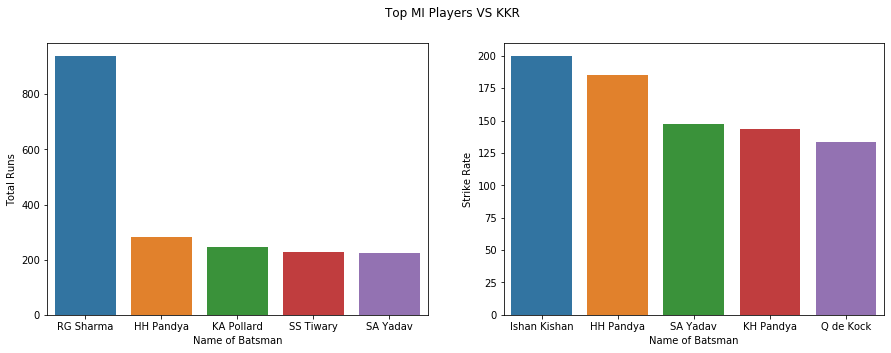

In [254]:
all=['RG Sharma','Q de Kock','CA Lynn','KA Pollard','KH Pandya','HH Pandya','Ishan Kishan','SA Yadav','SS Tiwary']
against = "Kolkata Knight Riders"
Batsman = pd.DataFrame(columns = ['Name', 'Runs','SR'])

for x in all:
    name = delivery[delivery['batsman']==x]
    s = name[name['bowling_team']==against]

    runs = s['batsman_runs'].sum()
    balls = s.shape[0]
    sr = (runs*100)/balls
    
    df = {'Name': x, 'Runs': runs, 'SR': sr}
    Batsman = Batsman.append(df, ignore_index = True)    

print(Batsman)
fig, axes = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Top MI Players VS KKR')

# Bulbasaur
Run_sor=Batsman.sort_values(by=['Runs'],ascending=False)
ax = sns.barplot(ax=axes[0],x="Name",y="Runs",data=Run_sor.head(5))
ax.set(xlabel="Name of Batsman", ylabel = "Total Runs")

# Charmander
Sr_sort=Batsman.sort_values(by=['SR'],ascending=False)
ax = sns.barplot(ax=axes[1],x="Name",y="SR",data=Sr_sort.head(5))
ax.set(xlabel="Name of Batsman", ylabel = "Strike Rate")

              Name Runs          SR
0       EJG Morgan  118  100.854701
1       KD Karthik  330  124.528302
2       AD Russell  174  147.457627
3          KK Nair  172  136.507937
4           N Rana  107  127.380952
5      RA Tripathi   65  104.838710
6  Shakib Al Hasan   93  119.230769
7     Shubman Gill  120  115.384615
8        SP Narine   41   91.111111


[Text(0, 0.5, 'Strike Rate'), Text(0.5, 0, 'Name of Batsman')]

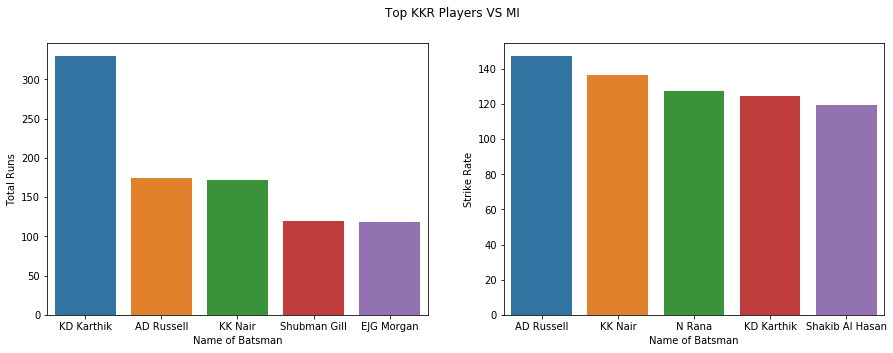

In [256]:
all=['EJG Morgan','KD Karthik','AD Russell','KK Nair','N Rana','RA Tripathi','Shakib Al Hasan','Shubman Gill','SP Narine']
against = "Mumbai Indians"
Batsman = pd.DataFrame( columns = ['Name', 'Runs','SR'])

for x in all:
    name = delivery[delivery['batsman']==x]
    s = name[name['bowling_team']==against]

    runs = s['batsman_runs'].sum()
    balls = s.shape[0]
    sr = (runs*100)/balls
    
    df = {'Name': x, 'Runs': runs, 'SR': sr}
    Batsman = Batsman.append(df, ignore_index = True)    

print(Batsman)
fig, axes = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Top KKR Players VS MI')

# Bulbasaur
Run_sor=Batsman.sort_values(by=['Runs'],ascending=False)
ax = sns.barplot(ax=axes[0],x="Name",y="Runs",data=Run_sor.head(5))
ax.set(xlabel="Name of Batsman", ylabel = "Total Runs")

# Charmander
Sr_sort=Batsman.sort_values(by=['SR'],ascending=False)
ax = sns.barplot(ax=axes[1],x="Name",y="SR",data=Sr_sort.head(5))
ax.set(xlabel="Name of Batsman", ylabel = "Strike Rate")

# Chennai Ground All Team Analysis 

C:\Users\abc\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':


          Name Runs          SR
0      PP Shaw    4   80.000000
1     S Dhawan  198  115.116279
2      SS Iyer   51  134.210526
3      RR Pant    5  166.666667
4     AR Patel   18   94.736842
5   MP Stoinis    0         NaN
6   SO Hetmyer    0    0.000000
7    AM Rahane   58  107.407407
8  SW Billings   56  243.478261
9    SPD Smith   94  122.077922


[Text(0, 0.5, 'Strike Rate'), Text(0.5, 0, 'Name of Batsman')]

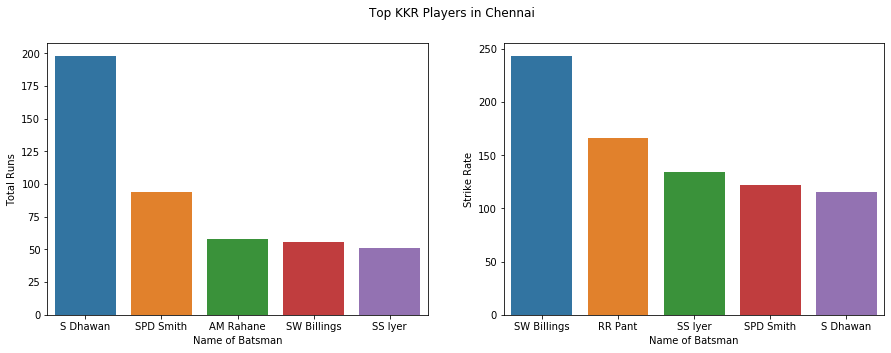

In [257]:
all=['PP Shaw','S Dhawan','SS Iyer','RR Pant','AR Patel','MP Stoinis','SO Hetmyer','AM Rahane','SW Billings','SPD Smith']
location = "Chennai"
Batsman = pd.DataFrame( columns = ['Name', 'Runs','SR'])

for x in all:
    name = delivery[delivery['batsman']==x]
    city = matches[matches['city']==location]
    s = name[name['id'].isin(city['id'])]

    runs = s['batsman_runs'].sum()
    balls = s.shape[0]
    sr = (runs*100)/balls
    
    df = {'Name': x, 'Runs': runs, 'SR': sr}
    Batsman = Batsman.append(df, ignore_index = True)    

print(Batsman)
fig, axes = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Top KKR Players in Chennai')

# Bulbasaur
Run_sor=Batsman.sort_values(by=['Runs'],ascending=False)
ax = sns.barplot(ax=axes[0],x="Name",y="Runs",data=Run_sor.head(5))
ax.set(xlabel="Name of Batsman", ylabel = "Total Runs")

# Charmander
Sr_sort=Batsman.sort_values(by=['SR'],ascending=False)
ax = sns.barplot(ax=axes[1],x="Name",y="SR",data=Sr_sort.head(5))
ax.set(xlabel="Name of Batsman", ylabel = "Strike Rate")

           Name Runs          SR
0     RG Sharma  152  118.750000
1     Q de Kock   27  103.846154
2       CA Lynn   22  104.761905
3    KA Pollard   79  116.176471
4     KH Pandya    1   25.000000
5     HH Pandya   57  150.000000
6  Ishan Kishan   28   87.500000
7      SA Yadav   87  108.750000
8     SS Tiwary   86   98.850575


[Text(0, 0.5, 'Strike Rate'), Text(0.5, 0, 'Name of Batsman')]

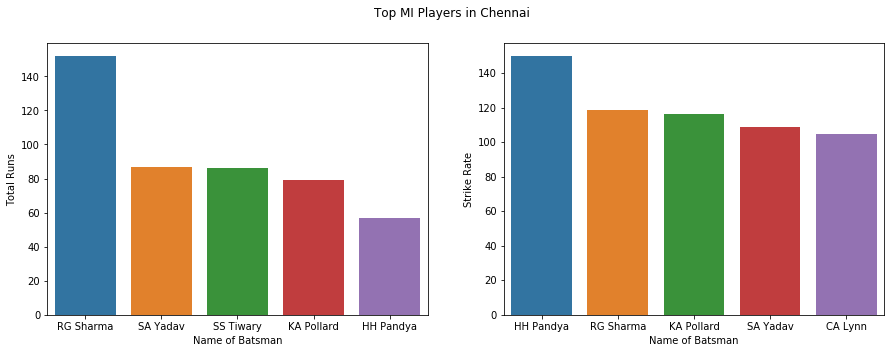

In [259]:
all=['RG Sharma','Q de Kock','CA Lynn','KA Pollard','KH Pandya','HH Pandya','Ishan Kishan','SA Yadav','SS Tiwary']
location = "Chennai"
Batsman = pd.DataFrame( columns = ['Name', 'Runs','SR'])

for x in all:
    name = delivery[delivery['batsman']==x]
    city = matches[matches['city']==location]
    s = name[name['id'].isin(city['id'])]

    runs = s['batsman_runs'].sum()
    balls = s.shape[0]
    sr = (runs*100)/balls
    
    df = {'Name': x, 'Runs': runs, 'SR': sr}
    Batsman = Batsman.append(df, ignore_index = True)    

print(Batsman)
fig, axes = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Top MI Players in Chennai')

# Bulbasaur
Run_sor=Batsman.sort_values(by=['Runs'],ascending=False)
ax = sns.barplot(ax=axes[0],x="Name",y="Runs",data=Run_sor.head(5))
ax.set(xlabel="Name of Batsman", ylabel = "Total Runs")

# Charmander
Sr_sort=Batsman.sort_values(by=['SR'],ascending=False)
ax = sns.barplot(ax=axes[1],x="Name",y="SR",data=Sr_sort.head(5))
ax.set(xlabel="Name of Batsman", ylabel = "Strike Rate")

C:\Users\abc\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':


            Name Runs          SR
0      DA Warner  186  108.139535
1      V Shankar   26  130.000000
2  Mohammad Nabi    0         NaN
3      MK Pandey  137  135.643564
4    Rashid Khan    0         NaN
5    JM Bairstow    0    0.000000
6  KS Williamson   26  130.000000
7        WP Saha  152  115.151515
8    Abdul Samad    0         NaN
9      KM Jadhav   69   89.610390


[Text(0, 0.5, 'Strike Rate'), Text(0.5, 0, 'Name of Batsman')]

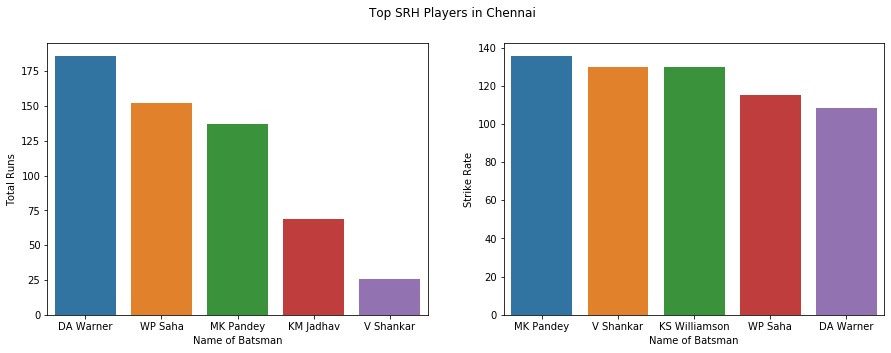

In [261]:
all=['DA Warner','V Shankar','Mohammad Nabi','MK Pandey','Rashid Khan','JM Bairstow','KS Williamson','WP Saha','Abdul Samad','KM Jadhav']
location = "Chennai"
Batsman = pd.DataFrame( columns = ['Name', 'Runs','SR'])

for x in all:
    name = delivery[delivery['batsman']==x]
    city = matches[matches['city']==location]
    s = name[name['id'].isin(city['id'])]

    runs = s['batsman_runs'].sum()
    balls = s.shape[0]
    sr = (runs*100)/balls
    
    df = {'Name': x, 'Runs': runs, 'SR': sr}
    Batsman = Batsman.append(df, ignore_index = True)    

print(Batsman)
fig, axes = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Top SRH Players in Chennai')

# Bulbasaur
Run_sor=Batsman.sort_values(by=['Runs'],ascending=False)
ax = sns.barplot(ax=axes[0],x="Name",y="Runs",data=Run_sor.head(5))
ax.set(xlabel="Name of Batsman", ylabel = "Total Runs")

# Charmander
Sr_sort=Batsman.sort_values(by=['SR'],ascending=False)
ax = sns.barplot(ax=axes[1],x="Name",y="SR",data=Sr_sort.head(5))
ax.set(xlabel="Name of Batsman", ylabel = "Strike Rate")

# Stadium Data Analysis


****************************************************************************************************************
************************************* Welcome to Stadium Data Analysis *****************************************
****************************************************************************************************************
 
 Royal Challengers Bangalore 
 Mumbai Indians 
 Kolkata Knight Riders 
 Chennai Super Kings 
 Kings XI Punjab 
 Rajasthan Royals 
 Sunrisers Hyderabad 
 Delhi Capitals

Enter Team 1 : Royal Challengers Bangalore
Enter Team 2 : Chennai Super Kings

 Chennai 
 Mumbai 
 Bangalore 
 Kolkata 
 Delhi 
 Hyderabad 
 Chandigarh 
  Jaipur

Enter Location : Bangalore


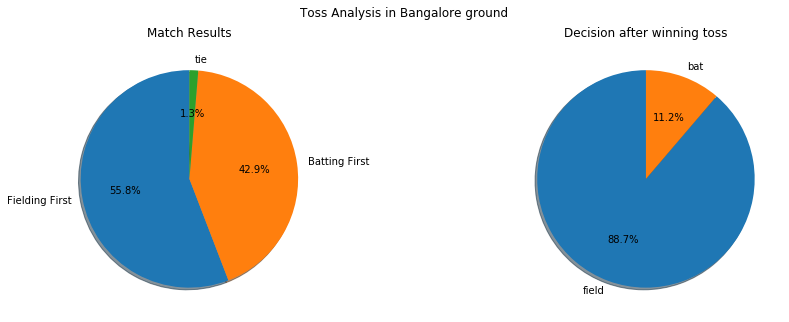

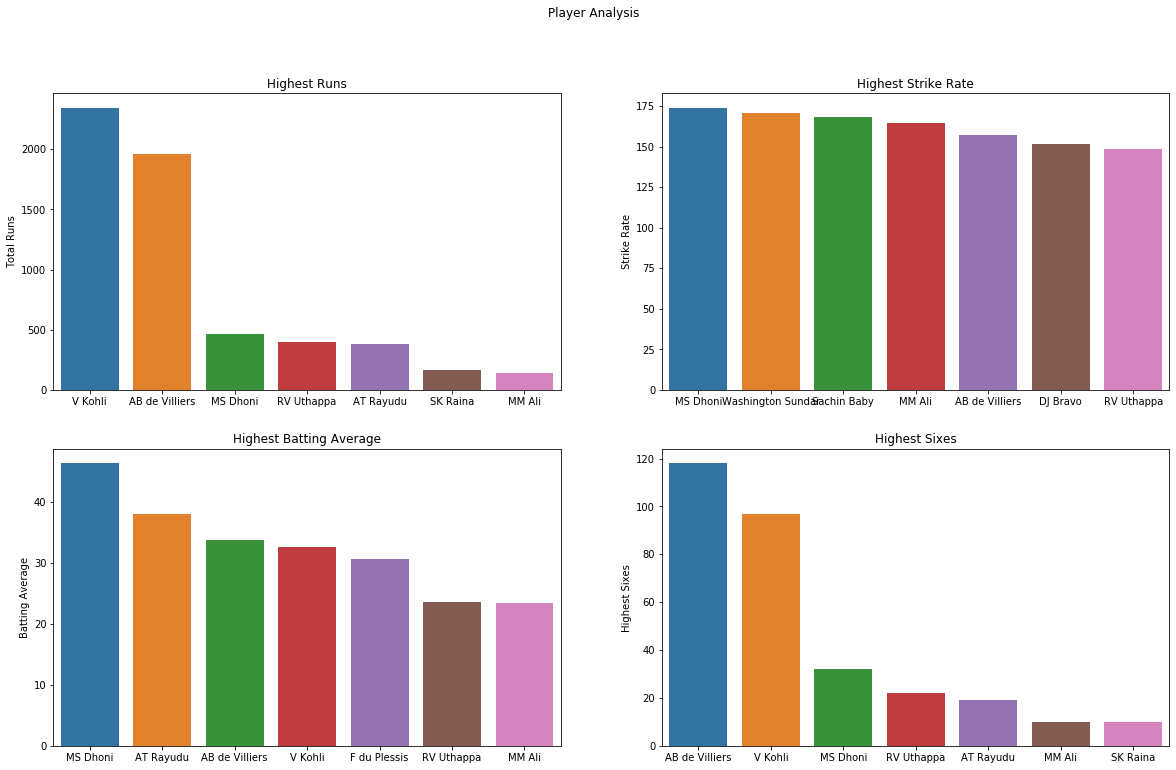

In [266]:
print()
print("****************************************************************************************************************")
print("************************************* Welcome to Stadium Data Analysis *****************************************")
print("****************************************************************************************************************")

print(" \n Royal Challengers Bangalore \n Mumbai Indians \n Kolkata Knight Riders \n Chennai Super Kings \n Kings XI Punjab \n Rajasthan Royals \n Sunrisers Hyderabad \n Delhi Capitals")
print()
#input("Enter Team 1 : ")
team1=input("Enter Team 1 : ")
team1_batsman=Teams[team1]
team2 = input("Enter Team 2 : ")
team2_batsman=Teams[team2]

print("\n Chennai \n Mumbai \n Bangalore \n Kolkata \n Delhi \n Hyderabad \n Chandigarh \n  Jaipur")
print()
location = input("Enter Location : ")

result = matches[matches['city']==location]

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
title= "Toss Analysis in "+location+" ground"
fig.suptitle(title)

df=result['result'].value_counts()
lst = list(df.index)
for i in range(len(lst)):
    if lst[i]=="runs":
        lst[i]="Batting First"
    elif lst[i]=="wickets":
        lst[i]="Fielding First"
    else:
        continue
        
ax1.pie(df,labels=lst,shadow=True,autopct='%1.1f%%',startangle=90)
ax1.set(title="Match Results")

df1 = result['toss_decision'].value_counts()
ax2.pie(df1,labels=list(df1.index),shadow=True,autopct='%1.1f%%',startangle=90)
ax2.set(title="Decision after winning toss")

plt.show()

Batsman = pd.DataFrame(columns = ['Name','Team','Runs','SR','Average','Sixes'])

for x in team1_batsman:
    name = delivery[delivery['batsman']==x]
    city = matches[matches['city']==location]
    s = name[name['id'].isin(city['id'])]
    
    runs = s['batsman_runs'].sum()
    sixes = (s['batsman_runs']==6).sum()
    balls = s.shape[0]
    if(balls>0):
        sr = (runs*100)/balls
    else:
        sr=0
    tm=len(pd.unique(s['id']))
    if tm>0:
        avg = runs/tm;
    else:
        avg=0
    
    df = {'Name': x,'Team': team1,'Runs': runs, 'SR': sr,'Average':avg,'Sixes':sixes}
    Batsman = Batsman.append(df, ignore_index = True)  

for x in team2_batsman:
    name = delivery[delivery['batsman']==x]
    city = matches[matches['city']==location]
    s = name[name['id'].isin(city['id'])]
    
    runs = s['batsman_runs'].sum()
    sixes = (s['batsman_runs']==6).sum()
    balls = s.shape[0]
    if(balls>0):
        sr = (runs*100)/balls
    else:
        sr=0
    tm=len(pd.unique(s['id']))
    if tm>0:
        avg = runs/tm;
    else:
        avg=0
    
    df = {'Name': x,'Team': team1,'Runs': runs, 'SR': sr,'Average':avg,'Sixes':sixes}
    Batsman = Batsman.append(df, ignore_index = True)  

#print(Batsman)
fig, axes = plt.subplots(2,2,figsize=(20,12))
title= "Player Analysis"
fig.suptitle(title)

Run_sor=Batsman.sort_values(by=['Runs'],ascending=False)
ax = sns.barplot(ax=axes[0,0],x="Name",y="Runs",data=Run_sor.head(7),dodge=False)
ax.set(xlabel="", ylabel = "Total Runs",title="Highest Runs")

Sr_sort=Batsman.sort_values(by=['SR'],ascending=False)
ax = sns.barplot(ax=axes[0,1],x="Name",y="SR",data=Sr_sort.head(7),dodge=False)
ax.set(xlabel="", ylabel = "Strike Rate",title="Highest Strike Rate")


Avg_sort=Batsman.sort_values(by=['Average'],ascending=False)
ax = sns.barplot(ax=axes[1,0],x="Name",y="Average",data=Avg_sort.head(7),dodge=False)
ax.set(xlabel="", ylabel = "Batting Average",title="Highest Batting Average")

Six_sort=Batsman.sort_values(by=['Sixes'],ascending=False)
ax = sns.barplot(ax=axes[1,1],x="Name",y="Sixes",data=Six_sort.head(7),dodge=False)
ax.set(xlabel="", ylabel = "Highest Sixes",title="Highest Sixes")

plt.show()

#  IPL Match Battle Analysis

****************************************************************************************************************
************************************ Welcome to IPL Team Battle Analysis ***************************************
****************************************************************************************************************
 
 Royal Challengers Bangalore 
 Mumbai Indians 
 Kolkata Knight Riders 
 Chennai Super Kings 
 Kings XI Punjab 
 Rajasthan Royals 
 Sunrisers Hyderabad 
 Delhi Capitals

Enter Team 1 : Kolkata Knight Riders
Enter Team 2 : Rajasthan Royals


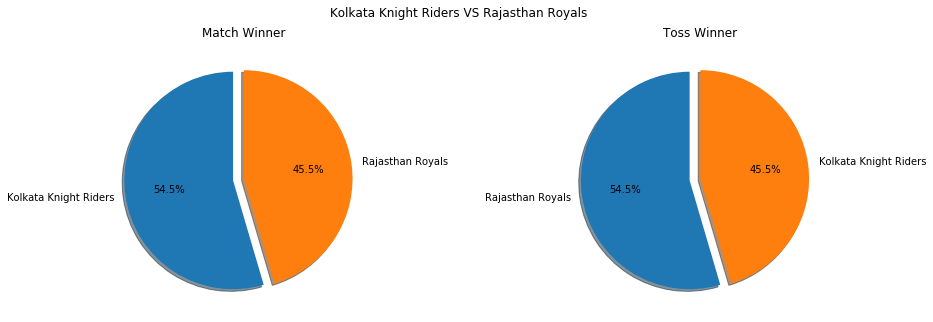

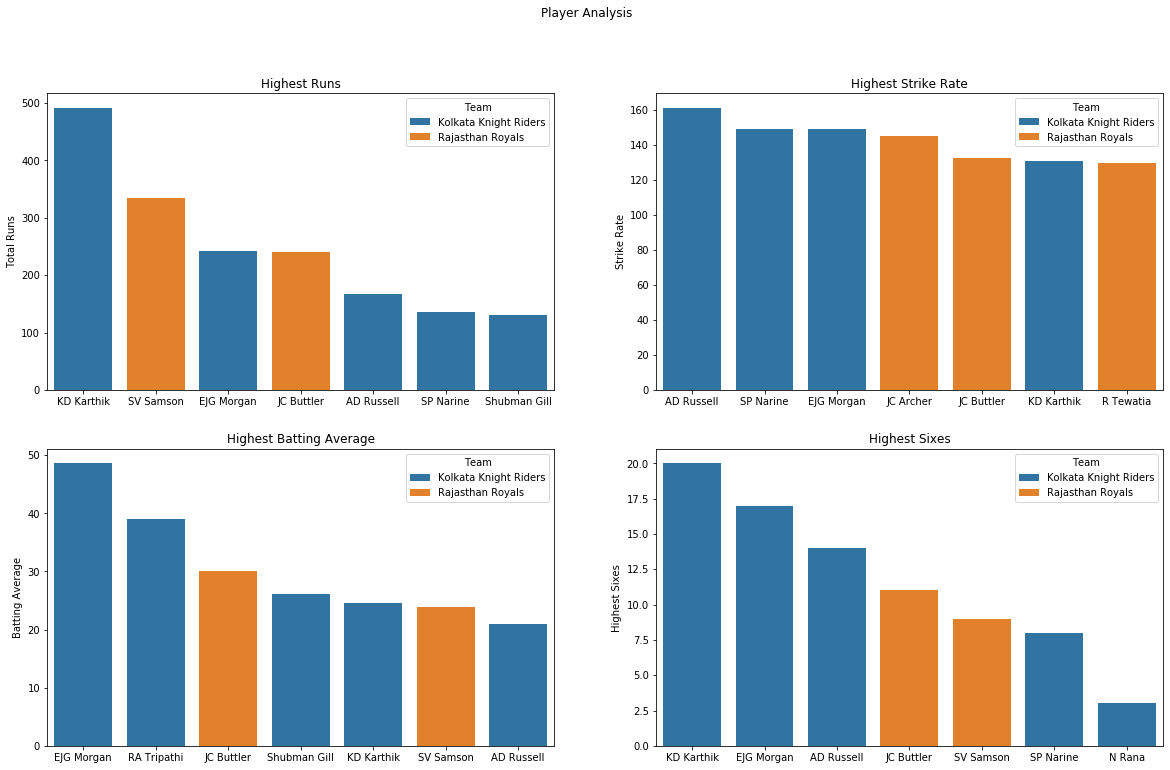

In [267]:
print("****************************************************************************************************************")
print("************************************ Welcome to IPL Team Battle Analysis ***************************************")
print("****************************************************************************************************************")

print(" \n Royal Challengers Bangalore \n Mumbai Indians \n Kolkata Knight Riders \n Chennai Super Kings \n Kings XI Punjab \n Rajasthan Royals \n Sunrisers Hyderabad \n Delhi Capitals")
print()
#
team1=input("Enter Team 1 : ")
team1_batsman=Teams[team1]
team2 =input("Enter Team 2 : ")
team2_batsman=Teams[team2]

Batsman = pd.DataFrame(columns = ['Name','Team','Runs','Sixes','SR','Average'])

result = matches[((matches['team1']==team1) & (matches['team2']==team2)) |
                 ((matches['team2']==team1) & (matches['team1']==team2))]

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
title= team1+" VS "+team2
fig.suptitle(title)

df=result['winner'].value_counts()
df1=result['toss_winner'].value_counts()
ax1.pie(df,labels=list(df.index),explode=(0.1,0),shadow=True,autopct='%1.1f%%',startangle=90)
ax1.set(title="Match Winner")
ax2.pie(df1,labels=list(df1.index),explode=(0.1,0),shadow=True,autopct='%1.1f%%',startangle=90)
ax2.set(title="Toss Winner")

plt.show()

for x in team1_batsman:
    name = delivery[delivery['batsman']==x]
    s = name[name['bowling_team']==team2]

    runs = s['batsman_runs'].sum()
    sixes = (s['batsman_runs']==6).sum()
    balls = s.shape[0]
    if(balls>0):
        sr = (runs*100)/balls
    else:
        sr=0
    tm=len(pd.unique(s['id']))
    if tm>0:
        avg = runs/tm;
    else:
        avg=0
        
    df = {'Name': x,'Team':team1, 'Runs': runs,'Sixes':sixes, 'SR': sr, 'Average':avg}
    Batsman = Batsman.append(df, ignore_index = True) 
    
for x in team2_batsman:
    name = delivery[delivery['batsman']==x]
    s = name[name['bowling_team']==team1]

    runs = s['batsman_runs'].sum()  
    sixes = (s['batsman_runs']==6).sum()
    balls = s.shape[0]
    if(balls>0):
        sr = (runs*100)/balls
    else:
        sr=0
    tm=len(pd.unique(s['id']))
    if tm>0:
        avg = runs/tm;
    else:
        avg=0
    
    df = {'Name': x,'Team':team2, 'Runs': runs,'Sixes':sixes, 'SR': sr, 'Average':avg}
    Batsman = Batsman.append(df, ignore_index = True)  
    
#print(Batsman)
fig, axes = plt.subplots(2,2,figsize=(20,12))
title= "Player Analysis"
fig.suptitle(title)

Run_sor=Batsman.sort_values(by=['Runs'],ascending=False)
ax = sns.barplot(ax=axes[0,0],x="Name",y="Runs",hue="Team",data=Run_sor.head(7),dodge=False)
ax.set(xlabel="", ylabel = "Total Runs",title="Highest Runs")

Sr_sort=Batsman.sort_values(by=['SR'],ascending=False)
ax = sns.barplot(ax=axes[0,1],x="Name",y="SR",hue="Team",data=Sr_sort.head(7),dodge=False)
ax.set(xlabel="", ylabel = "Strike Rate",title="Highest Strike Rate")


Avg_sort=Batsman.sort_values(by=['Average'],ascending=False)
ax = sns.barplot(ax=axes[1,0],x="Name",y="Average",hue="Team",data=Avg_sort.head(7),dodge=False)
ax.set(xlabel="", ylabel = "Batting Average",title="Highest Batting Average")

Six_sort=Batsman.sort_values(by=['Sixes'],ascending=False)
ax = sns.barplot(ax=axes[1,1],x="Name",y="Sixes",hue="Team",data=Six_sort.head(7),dodge=False)
ax.set(xlabel="", ylabel = "Highest Sixes",title="Highest Sixes")

plt.show()